# **Decision Tree Text Classification**
Classificação textual é um processo de categorização de texto em uma ou mais classes diferentes, e geralmente os classificadores são usados para estruturas texto, podem se criados baseados em regras de texto, ou baseado em ML, a partir de um conjunto pré rotulado, são treinados a associar textos a categorias.
Um exemplo de classificador é, dado um e-mail de entrada, ele é capaz de dizer se esse e-mail vai ou não para caixa de spam ou inbox.

### **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Load Data**

In [2]:
df = pd.read_csv('./datasets/BBCNews.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


### **EDA**

In [3]:
df['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [4]:
target_category = df['Category'].unique()
target_category

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [5]:
df['CategoryId'] = df['Category'].factorize()[0]
df

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,4
1487,1590,weak dollar hits reuters revenues at media gro...,business,0
1488,1587,apple ipod family expands market apple has exp...,tech,1


In [6]:
category = df[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


### **Visualize**

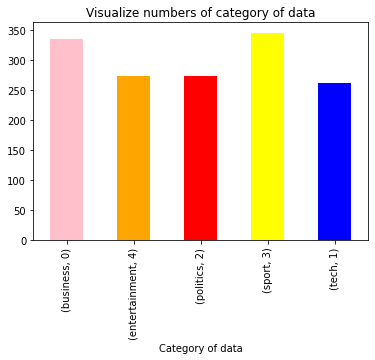

In [7]:
df.groupby('Category').CategoryId.value_counts().plot(kind='bar', color=['pink', 'orange', 'red', 'yellow', 'blue'])
plt.xlabel('Category of data')
plt.title('Visualize numbers of category of data')
plt.show()

### **Text Processing**

In [8]:
text = df['Text']
text

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object

In [9]:
category = df['Category']
category

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object

In [10]:
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)

df['Text'] = df['Text'].apply(remove_tags)

In [11]:
def special_char(text):
    reviews = ''
    
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews

df['Text'] = df['Text'].apply(special_char)

In [12]:
def convert_lower(text):
    return text.lower()

df['Text'] = df['Text'].apply(convert_lower)

In [13]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

df['Text'] = df['Text'].apply(remove_stopwords)

In [14]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])

df['Text'] = df['Text'].apply(lemmatize_word)

### **Text Representation**
Vetorizar os textos para a máquina entender.

In [15]:
x = df['Text']
y = df['CategoryId']

x = np.array(df.iloc[:,0].values)
y = np.array(df.CategoryId.values)

cv = CountVectorizer(max_features=5000)

x = cv.fit_transform(df.Text).toarray()

print("x.shape =", x.shape)
print("y.shape =", y.shape)

x.shape = (1490, 5000)
y.shape = (1490,)


In [16]:
df

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss 168m payout eighteen former enron d...,business,0
...,...,...,...,...
1485,857,double eviction big brother model caprice holb...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk joel...,entertainment,4
1487,1590,weak dollar hit reuters revenue medium group r...,business,0
1488,1587,apple ipod family expands market apple expande...,tech,1


### **Decision Tree Classifier**
É um algoritmo popular, fácil de explicar, ele basicamente controi uma arvore onde cada critério de decisão para distribuir ou segregar ou agregar o texto ele é mostrado nitidamente. Então conseguimos decidir o pq esse classificou daquela maneira.

<div align="center" style="margin-top: 40px;">
    <img src="./images/decision-tree.png" alt="Alt text" width="800"/>
</div>

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0, shuffle=True)
print(len(x_train))
print(len(x_test))

1341
149


In [24]:
perform_list = []

In [25]:
def run_model(model_name, est_c, est_pnlty):
    model = ""
    
    if model_name == 'Logistic Regression':
        model = LogisticRegression()
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        model = MultinomialNB(alpha=1.0, fit_prior=True)
    elif model_name == 'Support Vector Classifier':
        model = SVC()
    elif model_name == 'Decision Tree Classifier':
        model = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        model = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=4)
    elif model_name == 'Gaussian Naive Bayes':
        model = GaussianNB()
        
    oneVsRest = OneVsRestClassifier(model)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    
    # Get precision, recall, f1 score
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    
    print(f"Test Accuracy Score of Basic {model_name}: {accuracy}%")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1score}")

In [26]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: 81.21%
Precision: 0.8120805369127517
Recall: 0.8120805369127517
F1 Score: 0.8120805369127517


- Precision: é uma medida de pureza, de tudo que o meu classificador classificou, o quanto foi classificado corretamente
- Recall: é uma medida de completude.
- F1 Score: é uma medida que combina precisão e revocação pra dar uma ideia de acurácia do modelo.

In [27]:
classifier = DecisionTreeClassifier().fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [28]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons, I felt like people were not sensitive enough to my injuries. I felt like a not of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashim.'])
yy = classifier.predict(y_pred1)
result = ''

if yy == [0]:
    result = 'Business News'
elif yy == [1]:
    result = 'Tech News'
elif yy == [2]:
    result = 'Politics News'
elif yy == [3]:
    result = 'Sports News'
elif yy == [4]:
    result = 'Entertainment News'

print(result)

Business News
